# NLP SENTIMENT CLASSIFICATION PROJECT 

### Apple & Google Product Sentiment  


Author:  
Date: 


## 1. Business Understanding

Organizations such as **Apple, Google, and third-party consumer electronics companies** rely heavily on public opinion expressed on social media platforms like Twitter (X). These organizations face the ongoing challenge of understanding how customers feel about their products in real time. With millions of tweets created every day, it becomes difficult for product teams, customer experience teams, and marketing departments to manually monitor sentiment or identify trends quickly.

### **Stakeholder Analysis**
- **Primary Stakeholder:** Product and Marketing Teams at Apple and Google.
- **Secondary Stakeholders:**
  - Customer experience analysts  
  - Social media managers  
  - Competitor intelligence teams  
  - Consumer behavior researchers  

### **Problem Statement**
Stakeholders need to answer crucial questions such as:
- *“How are users reacting to our new feature or product launch?”*  
- *“Are negative emotions suddenly increasing around a particular product?”*  
- *“Which categories attract the most positive engagement?”*

Manually reviewing thousands of tweets is impractical. Without automation, stakeholders risk:
- Missing early warning signs of dissatisfaction  
- Failing to capitalize on positive sentiment  
- Responding slowly to product or service issues raised by customers  

### **Proposed Solution**
This project develops an **NLP(Natural Language Processing) sentiment classification model** that automatically identifies whether a tweet expresses positive, negative, or neutral sentiment toward Apple or Google products.

This model provides stakeholders with:
- A scalable, automated way to track brand sentiment  
- Faster insights for decision-making  
- Clear patterns in consumer reactions to product updates, launches, and issues  

### **Value Explanation**
The value of the project lies in enabling stakeholders to:
- Detect sentiment shifts early  
- Prioritize product improvements based on user feedback  
- Tailor marketing strategies to public perception  
- Benchmark Apple versus Google in terms of public sentiment  

This reflects a genuine real-world need: technology companies actively use automated sentiment monitoring to understand and respond to the voice of the customer.

### **Future Scope**
The workflow developed here lays the foundation for a more socially impactful project: analyzing tweets for **signs of depression or emotional distress**. Both projects require:
- Robust text preprocessing  
- Feature engineering  
- Classification modeling  
- Interpretability and responsible AI principles  

By addressing a real-world industry problem now, this project builds the technical and analytical skills required for a health-oriented NLP system in the future.


## 2. Environment Setup

In [41]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text Processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

# General
import warnings
warnings.filterwarnings("ignore")

nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /Users/la/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/la/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 3. Data Undestanding

### 3.1: Data Overview

The dataset used in this analysis consists of **9,093 tweets** collected for the purpose of analyzing sentiment toward technology brands. It contains three main features:

* **`tweet_text`** – the full content of the tweet.
* **`emotion_in_tweet_is_directed_at`** – the brand or product referenced in the tweet (e.g., Apple, Google).
* **`is_there_an_emotion_directed_at_a_brand_or_product`** – indicates whether the tweet expresses an emotion toward a brand/product.

The dataset is structured for a **multi-class classification problem**, where the target variable is the type of emotion expressed in the tweet. It combines textual content with brand related metadata, enabling the development of NLP models to detect sentiment and emotion.

The data is publicly available and imported using pandas

---


### 3.2: Data Description

#### 3.2.1: Importing the dataset

In [2]:
data = pd.read_csv('https://query.data.world/s/3r3b3chhfpyo7545c4regquyxcmc34?dws=00000',
                encoding='latin1')

In [3]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


#### 3.2.2: Basic Structure

In [4]:
#data shape
data.shape

(9093, 3)

In [5]:
#data columns
data.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

#### 3.2.3: Overview of column types and non-null values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


#### 3.2.4:Summary statistics Categorical

In [7]:
data.describe(include='O')

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


#### 3.2.5: Missing values

In [8]:
data.isna().mean()*100

tweet_text                                             0.010997
emotion_in_tweet_is_directed_at                       63.807324
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64

#### 3.2.6: Duplicates

In [9]:
data.duplicated().sum()

22

### 3.3: Data Summary

---
The dataset consists of **9,093 tweets** and includes three main features:

* **`tweet_text`** – the full tweet content
* **`emotion_in_tweet_is_directed_at`** – the brand or product referenced
* **`is_there_an_emotion_directed_at_a_brand_or_product`** – whether the tweet expresses emotion toward a brand/product

---
The data basic structure and quality:

* The **`tweet_text`** column is almost complete, with **9,092 non-null entries** and **9,065 unique tweets**, indicating very high diversity and minimal missing data.
* The **`emotion_in_tweet_is_directed_at`** column shows significant sparsity, with **63.8% missing values**, suggesting that many tweets do not mention a specific brand. Among the populated entries, there are **9 unique categories**, with **iPad** being the most frequently referenced.
* The **emotion-indicator** column is fully complete (**0% missing**) with **4 distinct categories**, where the most common label is **“No emotion toward brand or product”**.

* Only **22 duplicate records** are present, which is less than **0.25%** of the dataset, making it largely clean and ready for further preprocessing.

---

**Overall** This dataset provides a solid foundation for objectives outlined i.e. `Emotion classification, Brand sentiment analysis, NLP-based tweet modeling`
Despite the sparsity in brand-target information, the dataset contains **rich textual content** and **reliable emotion labels** that support exploratory analysis and machine learning applications.


## 4: Data Preparation

### 4.1: Data Cleaning

#### 4.1.1: Making a copy of the data

In [10]:
#copy
df = data.copy()
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


#### 4.1.2: Removing Duplicates

In [11]:
# Checking the number of rows before deduplication
print(f"Shape Before: {df.shape}")

#rmv duplicates
df = df.drop_duplicates()

#resetting index
df = df.reset_index(drop=True)

# Checking the number of rows after deduplication
print(f"Shape After: {df.shape}")

Shape Before: (9093, 3)
Shape After: (9071, 3)


#### 4.1.3: Handling missing values

In [12]:
#checking 'emotion_in_tweet_is_directed_at'
df['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
iPad                               945
Apple                              659
iPad or iPhone App                 469
Google                             428
iPhone                             296
Other Google product or service    293
Android App                         80
Android                             77
Other Apple product or service      35
Name: count, dtype: int64

In [13]:
#renaming columns 
df = df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'target_product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment_label'
})

df.head()

,tweet,target_product,sentiment_label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [14]:
#removing the null values on all columns for simplicity
df = df.dropna().reset_index(drop=True)

#cleanup validation
df.isna().sum()

tweet              0
target_product     0
sentiment_label    0
dtype: int64

In [15]:
df['target_product'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [16]:
apple_terms = ['apple', 'iphone', 'ipad', 'mac', 'ios']
google_terms = ['google', 'android', 'nexus', 'pixel']

# Convert the product label to lowercase
df['target_product'] = df['target_product'].str.lower()

# Helper function to classify each row
def classify_brand(text):
    if any(term in text for term in apple_terms):
        return 'apple'
    if any(term in text for term in google_terms):
        return 'google'
    return 'other'   # In case something unexpected slips through

# Apply classification
df['company'] = df['target_product'].apply(classify_brand)

df.head()

,tweet,target_product,sentiment_label,company
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iphone,Negative emotion,apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,ipad or iphone app,Positive emotion,apple
2,@swonderlin Can not wait for #iPad 2 also. The...,ipad,Positive emotion,apple
3,@sxsw I hope this year's festival isn't as cra...,ipad or iphone app,Negative emotion,apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,Positive emotion,google


In [17]:
df['company'].unique()

array(['apple', 'google'], dtype=object)

#### 4.1.4: Normalizing text (lowercase, remove URLs, mentions, hashtags)

In [18]:
def clean_text(text):
    text = str(text).lower()                                 # Lowercase
    
    # Correct URL removal
    text = re.sub(r'http\S+|www\S+', '', text)               # Remove URLs
    
    text = re.sub(r'@\w+', '', text)                         # Remove mentions
    text = re.sub(r'#', '', text)                            # Remove #
    text = re.sub(r'[^a-z\s]', ' ', text)                    # Remove punctuation/numbers
    text = re.sub(r'\s+', ' ', text).strip()                 # Remove extra whitespace
    return text

#### 4.1.5: Removing stopwords

In [19]:
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    text = clean_text(text)  # your cleaning function
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)
df['processed_text'] = df['tweet'].apply(preprocess_text)

In [20]:
df.head()

,tweet,target_product,sentiment_label,company,processed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iphone,Negative emotion,apple,g iphone hrs tweeting rise austin dead need up...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,ipad or iphone app,Positive emotion,apple,know awesome ipad iphone app likely appreciate...
2,@swonderlin Can not wait for #iPad 2 also. The...,ipad,Positive emotion,apple,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,ipad or iphone app,Negative emotion,apple,hope year festival crashy year iphone app sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,Positive emotion,google,great stuff fri sxsw marissa mayer google tim ...


#### 4.1.6: Lemmatize words 

In [21]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    words = text.split()
    lem_words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(lem_words)
df['processed_text'] = df['processed_text'].apply(lemmatize_text)

In [22]:
df.head()

,tweet,target_product,sentiment_label,company,processed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iphone,Negative emotion,apple,g iphone hr tweeting rise austin dead need upg...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,ipad or iphone app,Positive emotion,apple,know awesome ipad iphone app likely appreciate...
2,@swonderlin Can not wait for #iPad 2 also. The...,ipad,Positive emotion,apple,wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,ipad or iphone app,Negative emotion,apple,hope year festival crashy year iphone app sxsw
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,google,Positive emotion,google,great stuff fri sxsw marissa mayer google tim ...


## 5: Exploratory Data Analysis (EDA)

In [23]:
df['sentiment_label'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [24]:
df['text_len'] = df['processed_text'].apply(lambda x: len(x.split()))
df['text_len'].describe()

count    3282.000000
mean       11.475320
std         3.143257
min         3.000000
25%         9.000000
50%        12.000000
75%        14.000000
max        21.000000
Name: text_len, dtype: float64

In [26]:
# Sentiment distribution
print("Sentiment distribution:")
print(df["sentiment_label"].value_counts())

# Brand distribution
print("\nCompany distribution:")
print(df["company"].value_counts())

Sentiment distribution:
sentiment_label
Positive emotion                      2664
Negative emotion                       518
No emotion toward brand or product      91
I can't tell                             9
Name: count, dtype: int64

Company distribution:
company
apple     2404
google     878
Name: count, dtype: int64


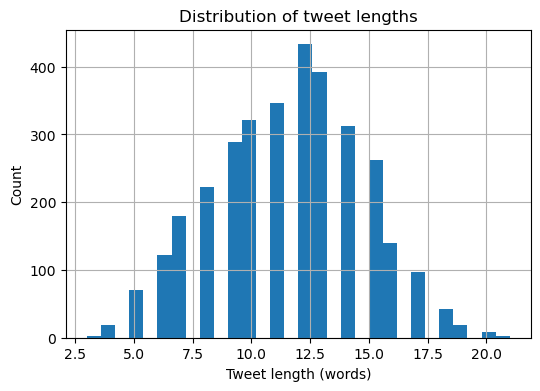

In [ ]:
#plotting the distribution of tweet lengths

plt.figure(figsize=(6,4))
df["text_len"].hist(bins=30)
plt.xlabel("Tweet length (words)")
plt.ylabel("Count")
plt.title("Distribution of tweet lengths")
plt.show()

<Figure size 600x400 with 0 Axes>

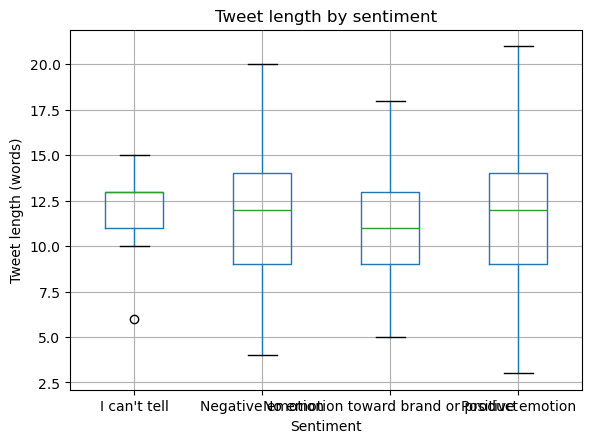

In [ ]:
#plotting the distribution of tweet lengths by sentiment
plt.figure(figsize=(6,4))
df.boxplot(column="text_len", by="sentiment_label")
plt.title("Tweet length by sentiment")
plt.suptitle("")
plt.xlabel("Sentiment")
plt.ylabel("Tweet length (words)")
plt.show()

sentiment_label  I can't tell  Negative emotion  \
company                                           
apple                       7               387   
google                      2               131   

sentiment_label  No emotion toward brand or product  Positive emotion  
company                                                                
apple                                            65              1945  
google                                           26               719  


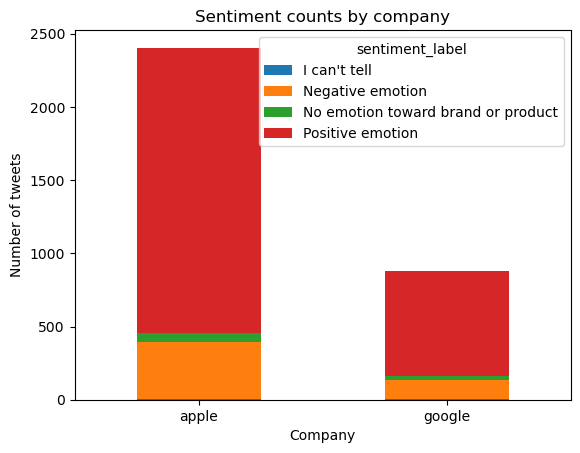


Sentiment proportions by company:
sentiment_label  I can't tell  Negative emotion  \
company                                           
apple                0.002912          0.160982   
google               0.002278          0.149203   

sentiment_label  No emotion toward brand or product  Positive emotion  
company                                                                
apple                                      0.027038          0.809068  
google                                     0.029613          0.818907  


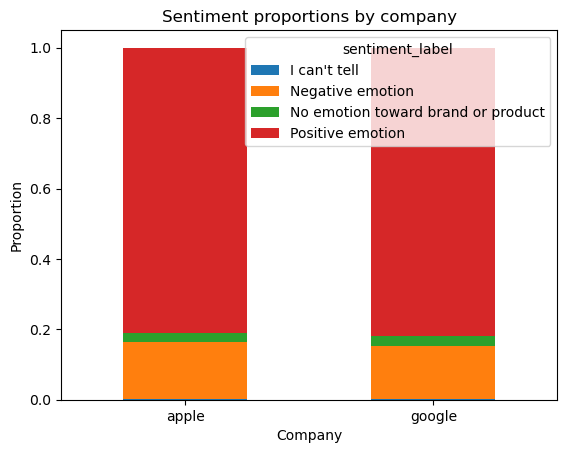

In [30]:
sent_by_company = df.groupby(["company", "sentiment_label"]).size().unstack(fill_value=0)
print(sent_by_company)

# Stacked bar plot
sent_by_company.plot(kind="bar", stacked=True)
plt.title("Sentiment counts by company")
plt.xlabel("Company")
plt.ylabel("Number of tweets")
plt.xticks(rotation=0)
plt.show()

# Proportions (normalized per company)
sent_by_company_prop = sent_by_company.div(sent_by_company.sum(axis=1), axis=0)
print("\nSentiment proportions by company:")
print(sent_by_company_prop)

sent_by_company_prop.plot(kind="bar", stacked=True)
plt.title("Sentiment proportions by company")
plt.xlabel("Company")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

In [35]:
def get_top_n_words(corpus, n=20):
    vec = CountVectorizer()
    X = vec.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, int(sum_words[0, idx])) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

In [38]:
pos_corpus = df[df["sentiment_label"] == "Positive emotion"]["processed_text"].astype(str).tolist()
neg_corpus = df[df["sentiment_label"] == "Negative emotion"]["processed_text"].astype(str).tolist()

top_pos = get_top_n_words(pos_corpus, n=20)
top_neg = get_top_n_words(neg_corpus, n=20)

print("Top positive words:")
for w, f in top_pos:
    print(f"{w}: {f}")

print("\nTop negative words:")
for w, f in top_neg:
    print(f"{w}: {f}")

Top positive words:
sxsw: 2823
ipad: 1136
link: 1087
apple: 863
rt: 830
google: 633
store: 511
iphone: 492
quot: 412
app: 362
new: 319
austin: 266
pop: 197
android: 185
amp: 181
get: 164
launch: 152
one: 143
line: 135
party: 132

Top negative words:
sxsw: 534
ipad: 197
quot: 159
iphone: 152
google: 130
rt: 126
apple: 116
link: 88
app: 54
store: 43
like: 41
new: 39
need: 30
austin: 28
apps: 28
people: 28
circle: 27
social: 25
design: 25
get: 23


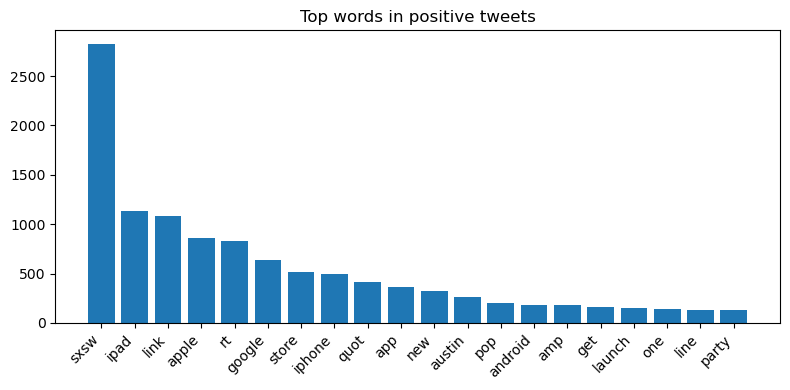

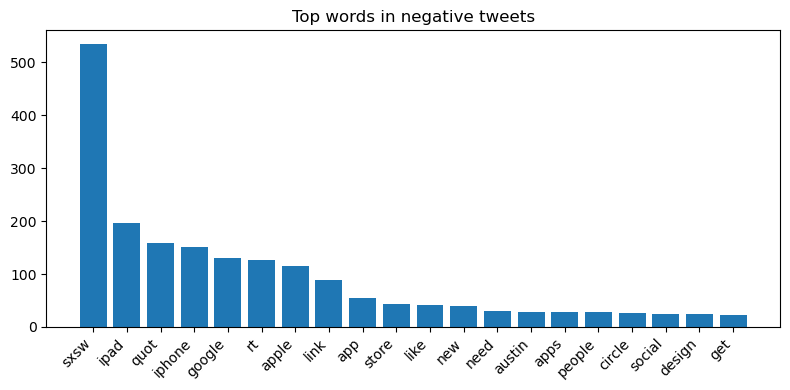

In [39]:
def plot_top_words(word_freq, title):
    words, freqs = zip(*word_freq)
    plt.figure(figsize=(8,4))
    plt.bar(range(len(words)), freqs)
    plt.xticks(range(len(words)), words, rotation=45, ha="right")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_top_words(top_pos, "Top words in positive tweets")
plot_top_words(top_neg, "Top words in negative tweets")

In [40]:
def get_top_n_ngrams(corpus, n=20, ngram_range=(2,2)):
    vec = CountVectorizer(ngram_range=ngram_range)
    X = vec.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    words_freq = [(word, int(sum_words[0, idx])) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_pos_bi = get_top_n_ngrams(pos_corpus, n=20, ngram_range=(2,2))
top_neg_bi = get_top_n_ngrams(neg_corpus, n=20, ngram_range=(2,2))

print("Top positive bigrams:")
for w, f in top_pos_bi:
    print(f"{w}: {f}")

print("\nTop negative bigrams:")
for w, f in top_neg_bi:
    print(f"{w}: {f}")

Top positive bigrams:
sxsw link: 291
apple store: 206
link sxsw: 153
iphone app: 123
pop store: 123
ipad sxsw: 114
store sxsw: 109
sxsw apple: 103
austin sxsw: 93
sxsw ipad: 81
google map: 79
apple pop: 76
social network: 72
apple opening: 70
link via: 70
ipad app: 68
downtown austin: 68
store downtown: 65
temporary store: 65
ipad launch: 63

Top negative bigrams:
sxsw link: 23
apple store: 22
iphone app: 21
link sxsw: 20
rt google: 18
ipad design: 17
ipad sxsw: 17
quot sxsw: 15
design headache: 14
iphone sxsw: 14
news apps: 13
company america: 13
sxsw iphone: 12
google circle: 12
sxsw ipad: 12
quot apple: 12
ipad news: 12
new social: 12
fascist company: 12
iphone battery: 11


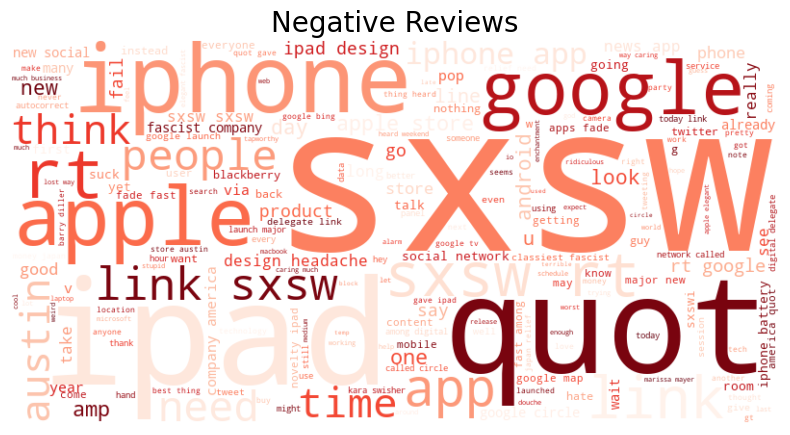

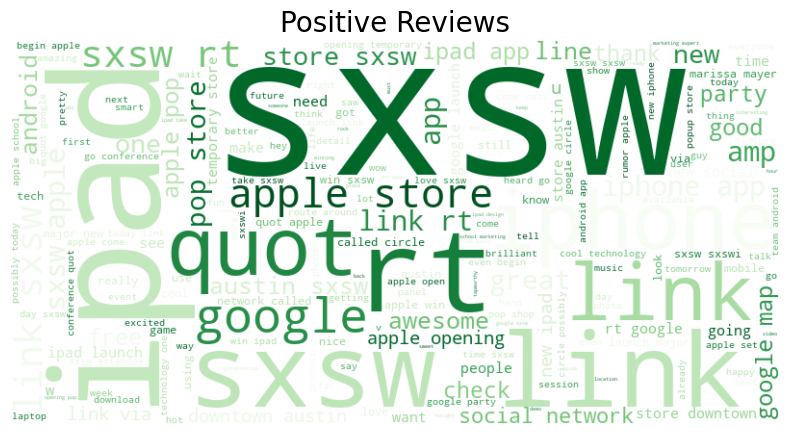

In [42]:
# Separate the texts based on their labels
negative_texts = ' '.join(df[df['sentiment_label'] == 'Negative emotion']['processed_text'])
positive_texts = ' '.join(df[df['sentiment_label'] == 'Positive emotion']['processed_text'])

# Function to generate and plot word cloud
def plot_wordcloud(text, color, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Plot word clouds
plot_wordcloud(negative_texts, 'Reds', 'Negative Reviews')
plot_wordcloud(positive_texts, 'Greens', 'Positive Reviews')

In [44]:
keywords = ["battery", "crash", "lag", "slow", "overheat", "bug", "update"]

for kw in keywords:
    total = df["processed_text"].str.contains(kw, case=False, na=False).sum()
    neg = df[(df["sentiment_label"]=="Negative emotion") & (df["processed_text"].str.contains(kw, case=False, na=False))].shape[0]
    print(f"{kw}: total={total}, negative={neg}")

battery: total=34, negative=20
crash: total=15, negative=11
lag: total=2, negative=1
slow: total=8, negative=1
overheat: total=1, negative=1
bug: total=5, negative=3
update: total=43, negative=4


In [47]:
sent_by_product = df.groupby(["target_product", "sentiment_label"]).size().unstack(fill_value=0)
print(sent_by_product)

sentiment_label                  I can't tell  Negative emotion  \
target_product                                                    
android                                     0                 8   
android app                                 0                 8   
apple                                       2                95   
google                                      1                68   
ipad                                        4               125   
ipad or iphone app                          0                63   
iphone                                      1               102   
other apple product or service              0                 2   
other google product or service             1                47   

sentiment_label                  No emotion toward brand or product  \
target_product                                                        
android                                                           1   
android app                                      

In [48]:
sent_by_product = df.groupby(["target_product", "sentiment_label"]).size().unstack(fill_value=0)
print(sent_by_product)

sentiment_label                  I can't tell  Negative emotion  \
target_product                                                    
android                                     0                 8   
android app                                 0                 8   
apple                                       2                95   
google                                      1                68   
ipad                                        4               125   
ipad or iphone app                          0                63   
iphone                                      1               102   
other apple product or service              0                 2   
other google product or service             1                47   

sentiment_label                  No emotion toward brand or product  \
target_product                                                        
android                                                           1   
android app                                      

In [50]:
most_positive = sent_by_product["Positive emotion"].idxmax()
highest_pos_ratio = sent_by_product["Positive emotion"].max()
print("Most positive product:", most_positive, highest_pos_ratio)

Most positive product: ipad 792


In [52]:
most_positive = sent_by_product["Negative emotion"].idxmax()
highest_pos_ratio = sent_by_product["Negative emotion"].max()
print("Most negative product:", most_positive, highest_pos_ratio)

Most negative product: ipad 125


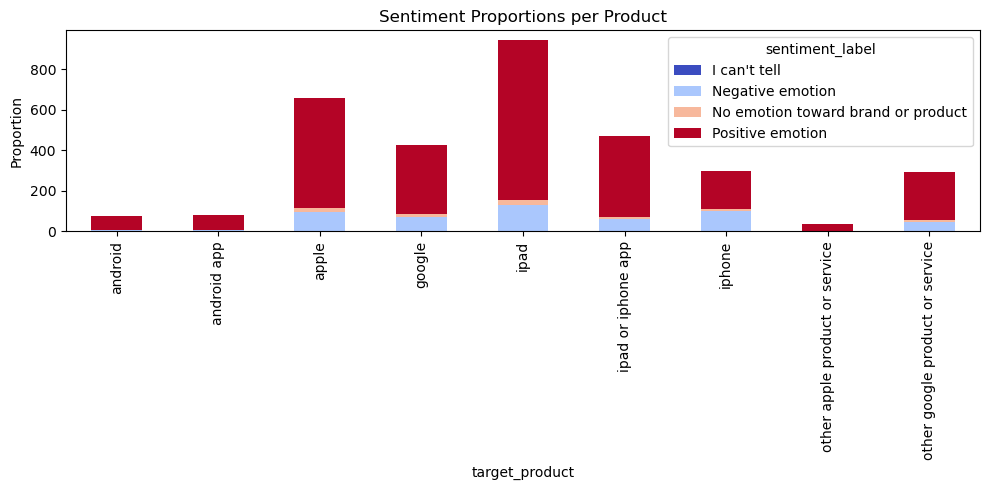

In [54]:
sent_by_product.plot(kind="bar", stacked=True, figsize=(10,5), colormap="coolwarm")
plt.title("Sentiment Proportions per Product")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()

In [56]:
#Apple only

apple_products = df[df["company"]=="apple"]
apple_sent = apple_products.groupby(["target_product","sentiment_label"]).size().unstack(fill_value=0)
print(apple_sent)

sentiment_label                 I can't tell  Negative emotion  \
target_product                                                   
apple                                      2                95   
ipad                                       4               125   
ipad or iphone app                         0                63   
iphone                                     1               102   
other apple product or service             0                 2   

sentiment_label                 No emotion toward brand or product  \
target_product                                                       
apple                                                           21   
ipad                                                            24   
ipad or iphone app                                              10   
iphone                                                           9   
other apple product or service                                   1   

sentiment_label                 Positive emoti

In [57]:
#google only

google_products = df[df["company"]=="google"]
google_sent = google_products.groupby(["target_product","sentiment_label"]).size().unstack(fill_value=0)
print(google_sent)


sentiment_label                  I can't tell  Negative emotion  \
target_product                                                    
android                                     0                 8   
android app                                 0                 8   
google                                      1                68   
other google product or service             1                47   

sentiment_label                  No emotion toward brand or product  \
target_product                                                        
android                                                           1   
android app                                                       1   
google                                                           15   
other google product or service                                   9   

sentiment_label                  Positive emotion  
target_product                                     
android                                        68  
android app   

## 6: Feature Engineering

### 6.1: TF-IDF vectors

### 6.2: Additional numeric features 

### 6.3: Encoded target labels

## 7: Baseline Models

### 7.1: Logistic Regression

### 7.2: Multinomial Naive Bayes

### 7.3: Random Forest

### 7.4: Support Vector Machine (SVM)

## 8: Model Comparison Table

## 9: Advanced Model  — LSTM / Deep Learning

## 10:Conclusions